# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

### Откроем файл с данными и изучим общую информацию. 

#### **Импорт и вывод таблицы**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('real_estate_data.csv', sep = '\t')
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### **Вывод общей информации**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### **Построим гистограммы по столбцам таблицы**

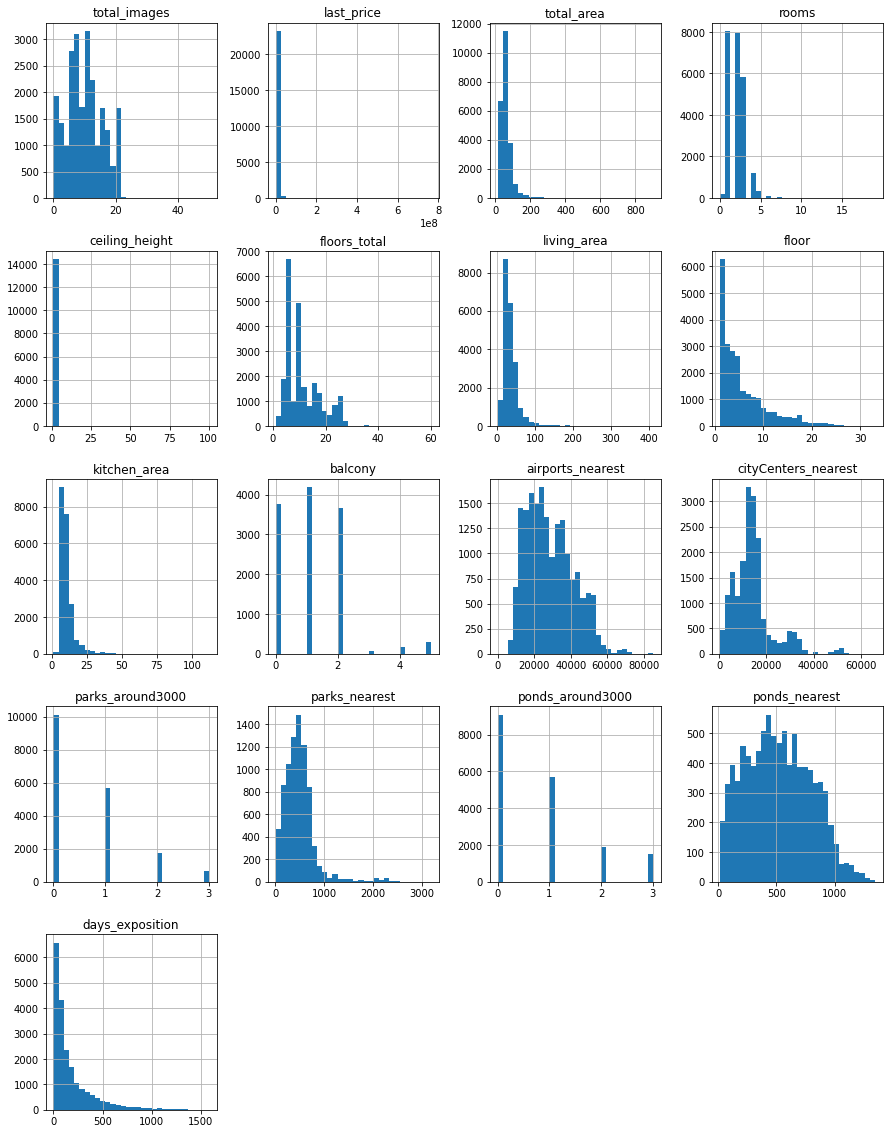

In [5]:
data.hist(bins = 30, figsize=(15, 20))
None

### Предобработка данных

#### **Поиск и обработка пропущенных значений в каждом столбце**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Рассмотрим столбец living_area(жилая площадь в кв.м.). В этом столбце можно заменить пропуски на медианное значение жилой площади квартир с тем же количеством комнат**

In [7]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

Заменим пропуски в столбце kitchen_area разностью общей площади и жилой

In [8]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])

**Рассмотрим столбец с количеством балконов:**

In [9]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

**Скорее всего, пропущенные значения здесь означают отсутствие балкона. Заменим пропуски на ноль**

In [10]:
data['balcony'] = data['balcony'].fillna(0) 

#### **Замена типов данных столбцов**

**Рассмотрим столбец first_day_exposition - дата публикации. Заменим тип данных object на datetime и округлим время до дней**

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1d')

**Заменим тип данных столбца balcony с float64 на int64**

In [12]:
data['balcony'] = data['balcony'].astype('int')

#### **Устранение неявных дубликатов**

**Устраним дубликаты в столбце locality_name (название населенного пункта)**

In [13]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [14]:
# Ф-ия local ищет в строке один из фрагментов 0-10 и, если находит, возвращает урезанную строку без фрагмента
def local(row):
    try:
        fragment_0 = 'железнодорожной'
        fragment_1 = 'станции'
        fragment_2 = 'деревня'
        fragment_3 = 'городской'
        fragment_4 = 'коттеджный'
        fragment_5 = 'городского'
        fragment_6  = 'поселок'
        fragment_7  = 'посёлок'
        fragment_8  = 'село'
        fragment_9  = 'некоммерческое'
        fragment_10 = 'садовое товарищество'
        if fragment_0 in row:
            return row[36::]
        if fragment_1 in row:
            return row[16::]
        if fragment_2 in row:
            return row[8::]
        if fragment_3 in row:
            return row[18::]
        if fragment_4 in row:
            return row[19::]
        if fragment_5 in row:
            return row[24::]
        if fragment_6 in row or fragment_7 in row:
            return row[8::]
        if fragment_8 in row:
            return row[5::]
        if fragment_9 in row:
            return row[42::]
        if fragment_10 in row:
            return row[21::]
        return row
    except:
        return row

**В столбце locality_name 49 пропусков. Это значит, что мы можем без последствий удалить строки, где есть пропуск в столбце locality_name**

In [15]:
data = data.dropna(subset = ['locality_name'])

**Вызовем функцию local и результат ее работы запишем в новый столбец local_change**

In [16]:
data['local_change'] = data['locality_name'].apply(local)

#### **Обработка выбросов и аномальных значений**

In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
local_change                0
dtype: int64

**В столбце rooms (количество комнат) удалим те строки, где комнат > 7**

In [18]:
data['rooms'].loc[data['rooms'] > 7].count()

31

**Таких строк всего 31, поэтому данные изменятся не критично**

In [19]:
data = data.loc[data['rooms'] <= 7]

**Рассмотрим столбец ceiling_height (высота потолков (м))** 

In [20]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,
      

**Очевидно, что высота не может быть такой большой, поэтому значения выше 19м уменьшим на порядок, т.к. это ошибка в записи**

In [21]:
def height(row):
    try:
        if row >= 20:
            return row/10
    except:
        return row
    return row
data['ceiling_height'] = data['ceiling_height'].apply(height)

**В столбце ceiling_height (высота потолков) слишком много пропусков, поэтому удалить такие строки нельзя. Выборка вряд ли сильно изменится, если заменить все пропущенные значения на медианное**

In [22]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

**Рассмотрим столбец kitchen_area**

In [23]:
data['kitchen_area'].sort_values().unique()

array([-44.4  , -24.785, -21.6  , ..., 353.   , 436.4  , 476.5  ])

**Вряд ли кухня может быть такой большой, поэтому значения выше 20 кв.м уменьшим на порядок**

In [37]:
def kitchen(row):
    try:
        if row >= 20:
            return row/10

        # Значения, записанные через тире программа воспринимает как минус, значит, берем по модулю
        if row < 0:
            row = abs(row)

        # Исправляем ошибку порядка десятков
        if row > 0 and row < 1:
            row = 10*row
    except:
        return row
    return row
data['kitchen_area'] = data['kitchen_area'].apply(kitchen)

In [38]:
data['kitchen_area'].sort_values().unique()

array([ 0.  ,  1.  ,  1.2 , ..., 19.9 , 19.92, 19.94])

**Рассмотрим столбец близость к ближайшему аэропорту**

In [39]:
data['airports_nearest'].sort_values().unique()     

array([ 6450.,  6914.,  6949., ..., 84853., 84869.,    nan])

**Удалим строку со значением ноль**

In [40]:
data = data.loc[data['airports_nearest'] != 0]

**В столбце с ценой удалим аномально низкие (<100к) и аномально высокие значения (>100 млн)**

In [41]:
data = data.loc[data['last_price'] > 100000]
data = data.loc[data['last_price'] < 100000000]

### Посчитаем и добавим в таблицу новые столбцы

**Добавим столбец со стоимостью одного квадратного метра**

In [42]:
data['per_square'] = data['last_price'] / data['total_area']

**Добавим столбец с днем публикации объявления**

In [43]:
data['number_day'] = data['first_day_exposition'].dt.weekday

**Добавим столбец с месяцем публикации объявления**

In [44]:
data['number_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

**Добавим столбец с годом публикации объявления**

In [45]:
data['number_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

**Добавим столбец с типом этажа квартиры. В столбце floors_total есть пропуски, поэтому точно определить тип этажа в таких строках не получится. Проставим тип "другой"**

In [46]:
def types(row):
        try:
            floor = row['floor']
            floors = row['floors_total']
            if floor == 1:
                return 'первый'
            elif floor == floors:
                return 'последний'
            return 'другой'
        except:
            return 'другой'
data['type_floor'] = data.apply(types, axis = 1)

**Добавим столбец с расстоянием до центра города в км**

In [47]:
try:
    data['city_сenters'] = round(data['cityCenters_nearest'] / 1000)
except:
    data['city_сenters'] = data['cityCenters_nearest']

### Проведем исследовательский анализ данных

In [48]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment            20828
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5533
cityCenters_nearest      5510
parks_around3000         5509
parks_nearest           15570
ponds_around3000         5509
ponds_nearest           14546
days_exposition          3168
local_change                0
per_square                  0
number_day                  0
number_month                0
number_year                 0
type_floor                  0
city_сenters             5510
dtype: int64

#### **Рассмотрим гистограммы данных**

**Столбец "total_area" (общая площадь).**

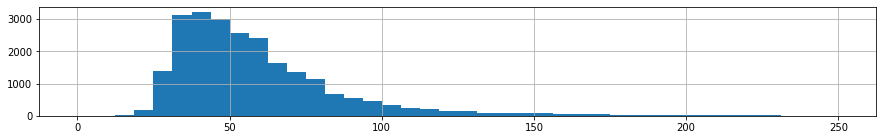

count    23583.000000
mean        59.639252
std         32.439105
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        517.000000
Name: total_area, dtype: float64

In [49]:
data['total_area'].hist(bins = 40, figsize = (15,2), range = (0,250))
plt.show()
data['total_area'].describe()

**Большинство недвижимости варьируется в диапазоне 40-50 кв.м. Однако, есть и очень маленькие и очень большие квартиры**

**Столбец "living_area" (жилая площадь).**

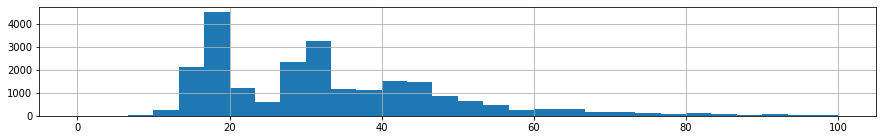

count    23583.000000
mean        33.934746
std         20.180258
min          2.000000
25%         18.370000
50%         30.300000
75%         42.500000
max        347.500000
Name: living_area, dtype: float64

In [50]:
data['living_area'].hist(bins = 30, figsize = (15,2), range = (0,100))
plt.show()
data['living_area'].describe()

**Подозрительно большое проседание в районе 25 кв.м. Скорее всего, это из-за пропусков**

**Столбец "kitchen_area" (площадь кухни).**

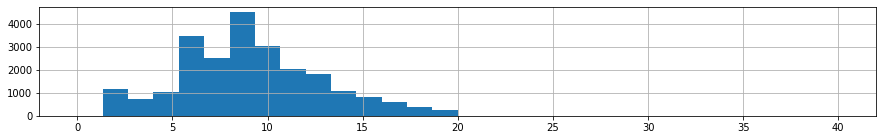

count    23583.000000
mean         9.050663
std          3.709142
min          0.000000
25%          6.300000
50%          8.700000
75%         11.000000
max         19.940000
Name: kitchen_area, dtype: float64

In [51]:
data['kitchen_area'].hist(bins = 30, figsize = (15,2), range = (0,40))
plt.show()
data['kitchen_area'].describe()

**Кухни действительно малого размера. График это отражает, хоть и имеет "резкий" характер**

**Столбец "last_price" (цена объекта)**

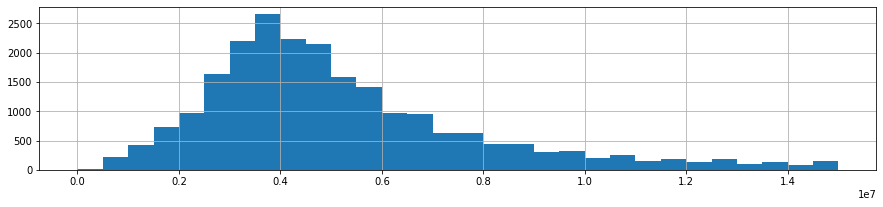

count    2.358300e+04
mean     6.221911e+06
std      6.349168e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

In [52]:
data['last_price'].hist(bins = 30, figsize = (15,3), range = (0,15000000))
plt.show()
data['last_price'].describe()

**График цены выглядит вполне правдоподобно. Больше всего квартир в диапазоне 4 млн. Удалены строки со стоимостью меньше 100к, т.к. скорее всего это объявления об аренде. Квартиры с очень высокой стоимостью (>100 млн) может и реальны, но их тоже удалили, т.к. они редкие и сбивают графики**

**Столбец "rooms" (количество комнат)**

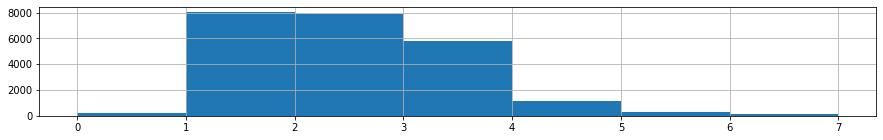

count    23583.000000
mean         2.055718
std          1.029643
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [53]:
data['rooms'].hist(bins = 7, figsize = (15,2), range = (0,7))
plt.show()
data['rooms'].describe()

**В данном столбце мы удаляли аномально высокие значения количества комнат. Чаще всего встречаются однокомнатные. Нулевое количество комнат скорее всего писали для студий или коммунальных квартир**

**Столбец "ceiling_height" (высота потолков)**

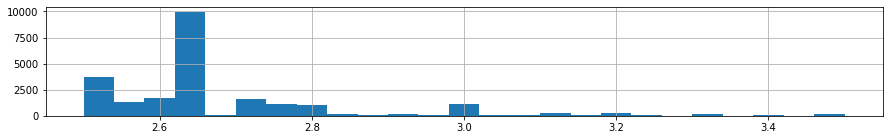

count    23583.000000
mean         2.697134
std          0.249573
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [54]:
data['ceiling_height'].hist(bins = 25, figsize = (15,2), range = (2.5,3.5))
plt.show()
data['ceiling_height'].describe()

**Данный столбец нельзя назвать точным, так как 9 тысяч пропусков были заменены на медианное значение 2.65 м**

**Этаж, тип этажа, количество этажей в доме (столбцы "floor", "type_floor" и "floors_total")**

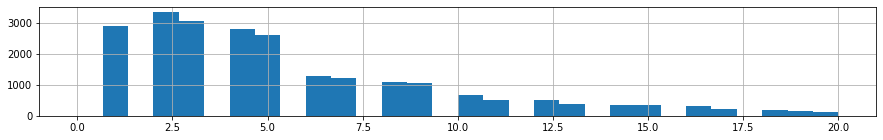

count    23583.000000
mean         5.896027
std          4.885037
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

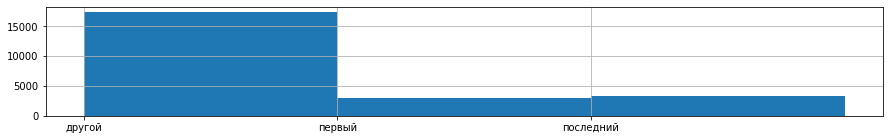

count      23583
unique         3
top       другой
freq       17371
Name: type_floor, dtype: object

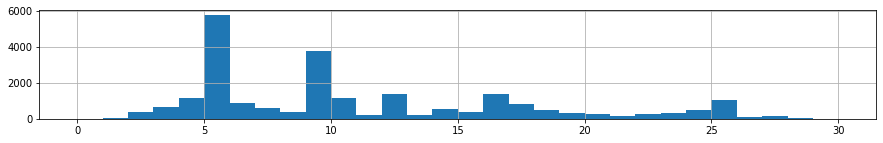

count    23498.000000
mean        10.687931
std          6.597463
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [55]:
# Этаж
data['floor'].hist(bins = 30, figsize = (15,2), range = (0,20))
plt.show()
display(data['floor'].describe())

# Тип этажа
data['type_floor'].hist(bins = 3, figsize = (15,2), range = (0,3))
plt.show()
display(data['type_floor'].describe())

# Количество этажей в доме
data['floors_total'].hist(bins = 30, figsize = (15,2), range = (0,30))
plt.show()
display(data['floors_total'].describe())

**Чаще всего продавались квартиры на низких этажах (ниже 6-ого). Старые 9-ти этажные панельные дома дают о себе знать**

**Столбец cityCenters_nearest (расстояние до центра города в метрах)**

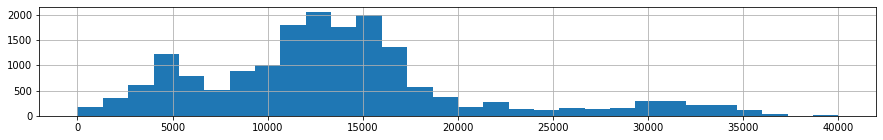

count    18073.000000
mean     14229.101367
std       8601.440235
min        181.000000
25%       9289.000000
50%      13135.000000
75%      16298.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [56]:
data['cityCenters_nearest'].hist(bins = 30, figsize = (15,2), range = (0,40000))
plt.show()
display(data['cityCenters_nearest'].describe())

**В этом столбце более 5 тысяч пропусков, но заменить их нельзя, т.к. нельзя предугадать где находится объект. Удалить их тоже нельзя, т.к. тогда пропадет более 20% выборки**

**Столбец airports_nearest (расстояние до ближайшего аэропорта в метрах)**

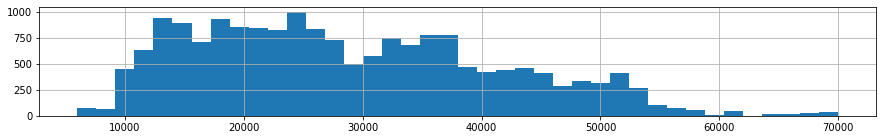

count    18050.000000
mean     28818.191025
std      12651.325446
min       6450.000000
25%      18557.000000
50%      26770.000000
75%      37334.750000
max      84869.000000
Name: airports_nearest, dtype: float64

In [57]:
data['airports_nearest'].hist(bins = 40, figsize = (15,2), range = (6000,70000))
plt.show()
display(data['airports_nearest'].describe())

**В этом столбце также много пропусков.**

**Столбец parks_nearest (расстояние до ближайшего парка в метрах)**

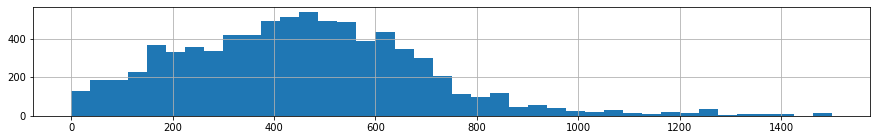

count    8013.000000
mean      491.150006
std       342.934815
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [59]:
data['parks_nearest'].hist(bins = 40, figsize = (15,2), range = (0,1500))
plt.show()
display(data['parks_nearest'].describe())

**Для решения задачи нам не понадобятся эти данные, поэтому закроем глаза на 15 тысяч пропусков**

**Столбцы number_day и number_month (день и месяц публикации объявления)**

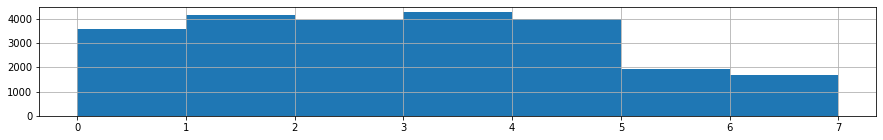

count    23583.000000
mean         2.568630
std          1.788881
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: number_day, dtype: float64

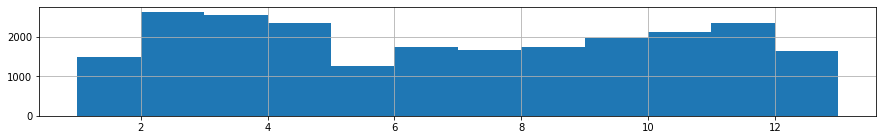

count    23583.000000
mean         6.403977
std          3.491866
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: number_month, dtype: float64

In [61]:
data['number_day'].hist(bins = 7, figsize = (15,2), range = (0,7))
plt.show()
display(data['number_day'].describe())
data['number_month'].hist(bins = 12, figsize = (15,2), range = (1,13))
plt.show()
display(data['number_month'].describe())

**Реже всего объявления о продаже публикуются в выходные. Спад наблюдается в мае, после чего количество объявлений возрастает до ноября и в декабре резко падает. Пик наблюдается в феврале и далее число объявлений снижается до мая**

#### Изучим, как быстро продавались квартиры по времени продажи (столбец days_exposition)

**Построим гистограмму**

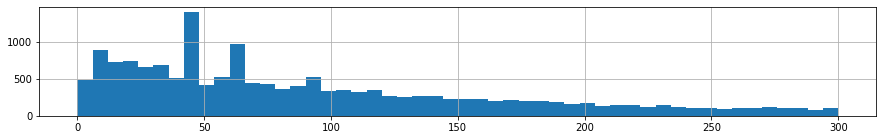

count    20415.000000
mean       180.308842
std        219.315035
min          1.000000
25%         45.000000
50%         95.000000
75%        230.500000
max       1580.000000
Name: days_exposition, dtype: float64

In [62]:
data['days_exposition'].hist(bins = 50, figsize = (15,2), range = (0,300))
plt.show()
display(data['days_exposition'].describe())

**Рассмотрим характеристики:**  
В данном столбце обнаружено 3 тысячи пропусков (13%), поэтому данные могут быть не совсем корректны  
- Среднее время - 180 дней
- Медиана - 95 дней  
Такая разница обусловлена тем, что некоторые объекты продаются очень долго.  
В среднем, продажа недвижимости занимает около 3-ёх месяцев.  
Если продажа была совершена менее, чем за 1.5 месяца, то такую продажу можно считать очень быстрой (до 1-ого квартиля).  
Очень долгой можно считать продажу дольше 7.5 месяцев (230 дней. После 3его квартиля)

#### Рассмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Зависимость цены от общей площади

**Составим график по столбцам last_price (цена на момент снятия) и total_area (общая площадь)**

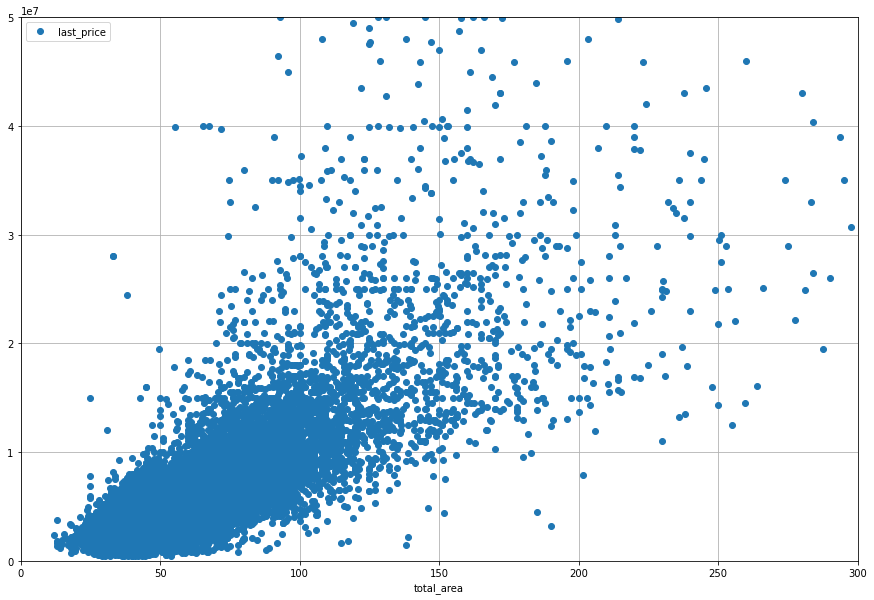

In [63]:
data.plot(x='total_area',
    y='last_price',
    style='o',
    xlim=(0, 300),
    ylim=(0, 0.5e8),
    figsize=(15, 10),
    grid=True
)

**По графику можно заметить, что с увеличением общей площади растет и стоимость объекта в среднем, хоть и существуют выбивающиеся из тенденции значения.**

**Расчет коэффициента корреляции**

In [64]:
print(data['total_area'].corr(data['last_price']))

0.766721480488597


**Можно сделать вывод, что зависимость цены от общей площади является достаточно сильной и прямо пропорциональной**

##### Зависимость цены от жилой площади

**Составим график по столбцам last_price (цена на момент снятия) и living_area (жилая площадь)**

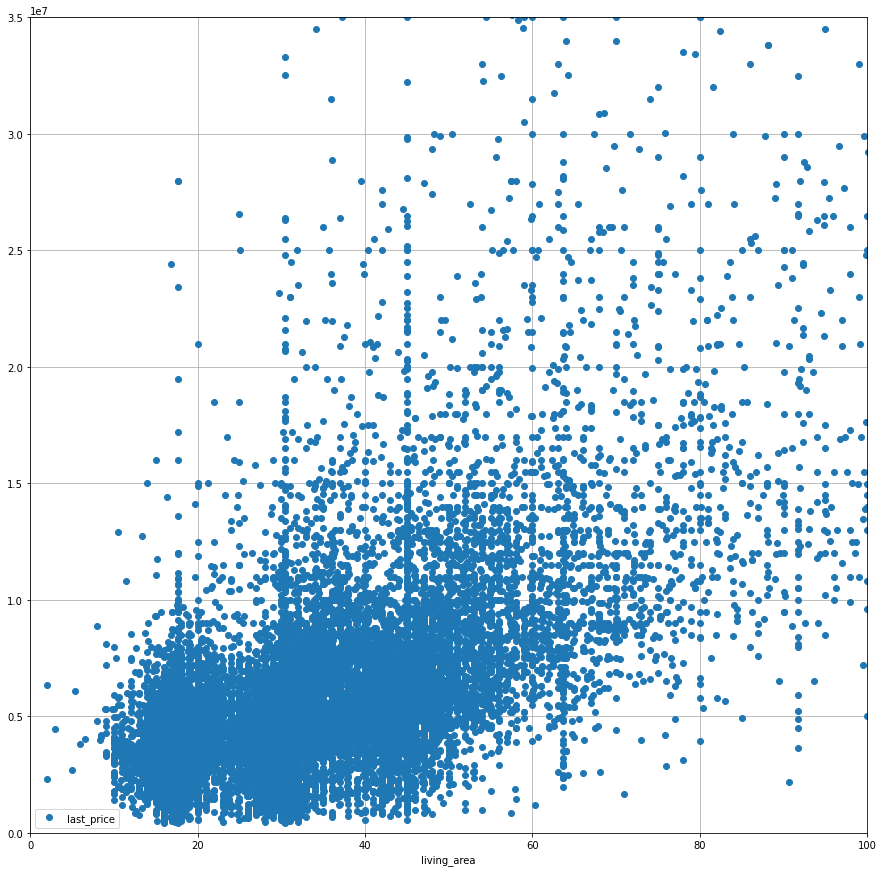

In [65]:
data.plot(x='living_area',
    y='last_price',
    style='o',
    xlim=(0, 100),
    ylim=(0, 0.35e8),
    figsize=(15, 15),
    grid=True
)

**По графику можно заметить, что с увеличением жилой площади растет и стоимость объекта в среднем, хоть и существуют выбивающиеся из тенденции значения.**

**Расчет коэффициента корреляции**

In [66]:
print(data['living_area'].corr(data['last_price']))

0.6515956951785064


**В данном сравнении зависимость меньше, но все еще прямо пропорциональная и превышает 0.5**

##### Зависимость цены от площади кухни

**Составим график по столбцам last_price (цена на момент снятия) и kitchen_area (площадь кухни)**

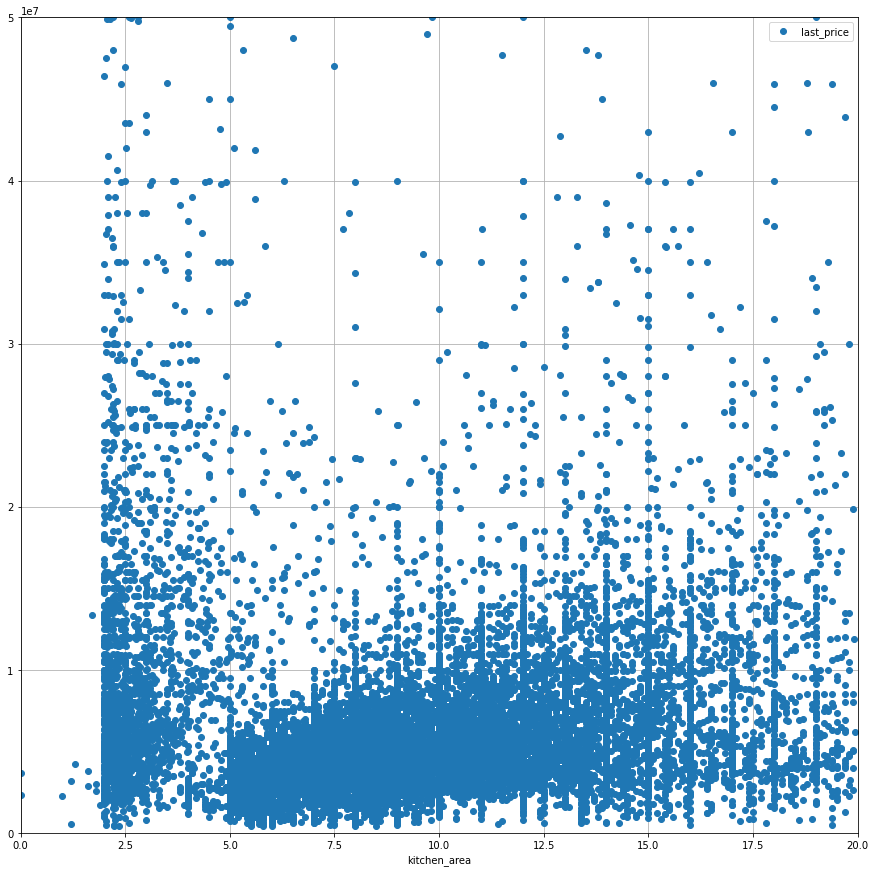

In [67]:
data.plot(x='kitchen_area',
    y='last_price',
    style='o',
    xlim=(0, 20),
    ylim=(0, 0.5e8),
    figsize=(15, 15),
    grid=True
)

**С площадью кухни все далеко не так однозначно. Зависимость не прослеживается. Площадь кухни либо не влияет, либо влияет очень слабо на стоимость жилья**

**Расчитаем коэффициент корреляции Пирсона**

In [68]:
print(data['kitchen_area'].corr(data['last_price']))

0.06976967371163757


**Предположение подтвердилось:  
Площадь кухни действительно никак не связана с ценообразованием**

##### Зависимость цены от количества комнат

**Составим график по столбцам last_price (цена на момент снятия) и rooms (количество комнат)**

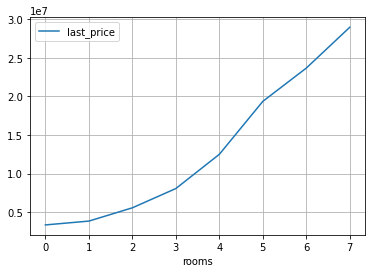

In [69]:
(data
    .pivot_table(index='rooms', values='last_price')
    .plot(grid = True)
)

**Зависимость является прямо пропорциональной и достаточно сильной**

**Расчитаем коэффициент корреляции Пирсона**

In [70]:
print(data['rooms'].corr(data['last_price']))

0.4612726080619954


##### Зависимость цены от типа этажа

**Составим график по столбцам last_price (цена на момент снятия) и type_floor (тип этажа)**

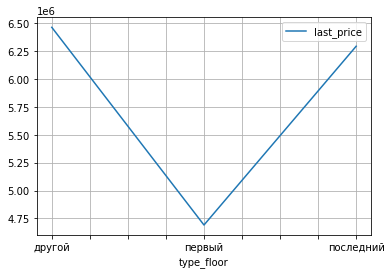

In [71]:
(data
    .pivot_table(index='type_floor', values='last_price')
    .plot(grid = True)
)

**Медианная стоимость квартир гораздо ниже на первом этаже. Последний этаж и все остальные имеют примерно одинаковую стоимость**

##### Зависимость цены от дня, месяца и года размещения объявления

**Составим график по столбцам:**  
- last_price (цена на момент снятия) и number_day (день размещения объявления)
- last_price (цена на момент снятия) и number_month (месяц размещения объявления)
- last_price (цена на момент снятия) и number_year (год размещения объявления)

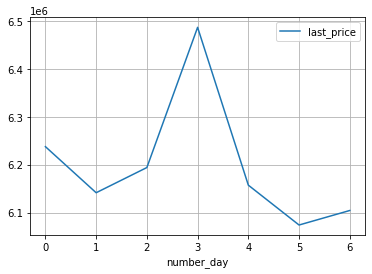

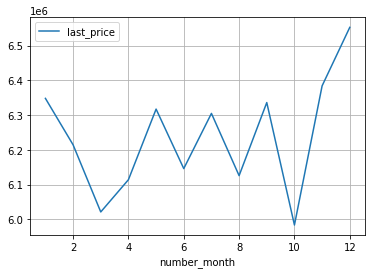

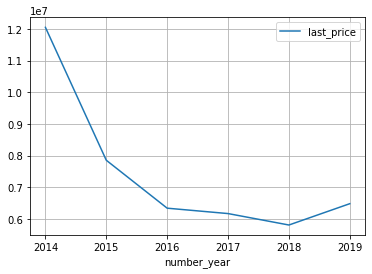

In [72]:
(data
    .pivot_table(index='number_day', values='last_price')
    .plot(grid = True)
)
(data
    .pivot_table(index='number_month', values='last_price')
    .plot(grid = True)
)
(data
    .pivot_table(index='number_year', values='last_price')
    .plot(grid = True)
)

**День: дороже всего выкладывались квартиры в четверг, а дешевле - в субботу. Зависимость не прослеживается**  
**Месяц: самые дорогие квартиры выкладывались в декабре и ноябре, но, в целом, зависимость не прослеживается**  
**Год: в среднем, медианная стоимость квартир уменьшалась со временем, но к 2019-ому году снова начала расти**

**Расчитаем коэффициент корреляции Пирсона**

In [73]:
print(data['number_day'].corr(data['last_price']))
print(data['number_month'].corr(data['last_price']))
print(data['number_year'].corr(data['last_price']))

-0.0030287997360853723
0.008999601489759756
-0.054353702241212686


**Как и ожидалось, зависимости между временем размещения объявления и ценой практически нет**

**Вывод: больше всего на стоимость объекта влияет его общая площадь**

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [74]:
# Создадим сводную таблицу по количеству объявлений в населенных пунктах и сразу ее отсортируем
# по убыванию значений столбца first_day_exposition
data_filter = data.pivot_table(index = 'local_change', values = 'first_day_exposition', aggfunc = 'count').sort_values(by = 'first_day_exposition', ascending = False)

# Срезаем таблицу по десяти самым высоким значениям
data_filter = data_filter[:10]

# Создаем таблицу со средним значением стоимости кв.м. по всем населенным пунктам
data_filter2 = data.pivot_table(index = 'local_change', values = 'per_square', aggfunc = 'mean')

# Объединяем таблицы по столбцу с названием населенного пункта
#data_filter3 = data_filter.merge(data_filter2, on='locality_name', how='inner')
data_filter4 = data_filter.join(data_filter2, on='local_change', how='left')

display(data_filter4)

,first_day_exposition,per_square
local_change,,
Санкт-Петербург,15655,113613.981773
Мурино,590,86087.512050
Кудрово,472,95324.930544
Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,337,75333.295801
Парголово,327,90175.913458
Гатчина,307,68746.146763


**Как и ожидалось, самый дорогой квадратный метр в Санкт-Петербурге (113 тыс/кв.м). Самый дешевый - в Выборге (58 тыс/кв.м)**

#### Ранее было расчитано расстояние до центра в километрах (city_сenters). Теперь выделим квартиры в Санкт-Петербурге с помощью столбца local_change и вычислим среднюю цену каждого километра

In [75]:
# Отфильтруем таблицу по населенному пункту
data_slice = data.loc[data['local_change'] == 'Санкт-Петербург']

# Посчитаем пропуски в столбце city_сenters
data_slice['city_сenters'].isna().sum()

60

**Пропусков в расстоянии по городу СПБ не так много, поэтому можем их удалить**

In [76]:
data_slice = data_slice.dropna(subset = ['city_сenters']) 

**Добавим новый столбец со стоимостью одного км**

In [77]:
data_slice['mean_price_km'] = data_slice['last_price'] / data_slice['city_сenters']

display(data_slice.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,local_change,per_square,number_day,number_month,number_year,type_floor,city_сenters,mean_price_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0,8.125000e+05
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0,3.711429e+05
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,NaN,...,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,другой,7.0,9.271429e+06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0,1.250000e+06
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.5,22,NaN,...,NaN,NaN,Санкт-Петербург,110544.692737,3,4,2019,другой,12.0,6.595833e+05


**Построим график зависимости цены от расстояния (в км) до центра Санкт-Петербурга**

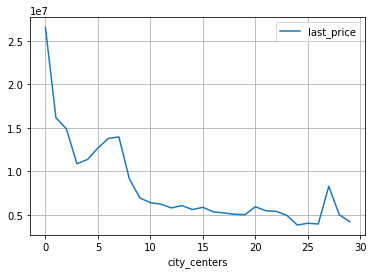

In [78]:
(data_slice
    .pivot_table(index='city_сenters', values='last_price')
    .plot(grid = True)
)

**Посчитаем коэффициент корреляции Пирсона**

In [79]:
print(data_slice['city_сenters'].corr(data_slice['last_price']))

-0.37113675802483825


**График говорит о том, что с увеличением расстояния от центра города медианная цена объекта недвижимости снижается, причем зависимость достаточно сильная, если не учитывать редкие выбросы, которые занижают коэффициент Пирсона**

**Проверим, есть ли разница в распределениях квартир в центре СПБ и общего датафрейма.  
    Пусть центр - не более 4 км в столбце city_сenters**

In [80]:
# Отфильтруем таблицу, содержащую только СПБ, по расстоянию от центра не более 4 км

data_slice_center = data_slice.loc[data_slice['city_сenters'] <= 4]
print(data_slice_center['local_change'].count())

# Отфильтруем таблицу, содержащую только СПБ, по расстоянию от центра более 4 км
data_slice_center_2 = data_slice.loc[data_slice['city_сenters'] > 4]
print(data_slice_center_2['local_change'].count())

1541
14054


In [81]:
1541/(14054+1541)*100

9.881372234690607

**Можно сделать вывод, что в центре СПБ 1541 квартира, тогда как в остальном городе 14054. В центре находятся 10% квартир от их общего числа**

### Общий вывод

**Проведен анализ рынка недвижимости в городе Санкт-Петербург и его области. Была проведена предобработка данных.  
Сделаны следующие выводы:**
- Самая дорогая земля находится в черте города
- Средняя площадь объекта недвижимости находится в пределах 40-50 кв.м, а средняя цена примерно 4-5 млн рублей
- Самые популярные квартиры - однокомнатные
- Чаще всего объявления о продаже выходят в будние дни и ближе к концу года  
Выводы расчетов:
- Зависимость цены от общей (и жилой) площади: Прямо пропорциональная и ярко выраженная. Основной фактор ценообразования
- Цена не зависит от площади кухни
- Зависимость цены от количества комнат: Прямо пропорциональная и ярко выраженная. 
- Зависимость цены от типа этажа: Квартиры на первом этаже сильно дешевле тех, что находятся на последнем или других этажах
- Зависимость цены от дня, месяца и года размещения объявления: От дня и месяца не зависит. По годам - цена падала до 2018-ого, а после начала расти
- Самый дорогой квадратный метр в Санкт-Петербурге, а самый дешевый - в Выборге (среди самых богатых на объявления городов).
- Чем дальше от центра города находится объект недвижимости, тем дешевле его цена. Зависимость обратно пропорциональная и ярко выраженная
- В центре города находится 10% от всех квартир в городе